<H2><CENTER> Static Data Visualization in AIDA using Bixi Bicyle Trip Data set</CENTER></H2>

In this workflow, we will demonstrate how AIDA provides data visualization support even though it is a database resident framework.

For this purpose we will make use of the montreal Bixi biking data set for the year 2017 https://www.kaggle.com/aubertsigouin/biximtl/data.<br> 

<HR>
Once we import AIDA components, we are good to go !

In [1]:
from aida.aida import *;

Let us start by establishing a connection to the database and get a connection object. This is syntactically very similar to any JDBC/ODBC based applications.

In [2]:
host='cerberus'; dbname='demo'; user='demo'; passwd='demo'; jobName='BixiExplorerStatic'; port=55660;
dw = AIDA.connect(host, dbname, user, passwd, jobName, port);

We will build a histogram using matplotlib to understand the distribution of trip durations across various bicycle trips.

In [3]:
def scatterSizePrice(dw):
    from aida.aida import COUNT, Q, CMP;
    import numpy as np;
    from matplotlib import colors;
    td = dw.tripdata2017.filter(Q('stscode', 'endscode', CMP.NE)).project(('duration',));
    data = td.cdata;
    fig = plt.figure();
    ax = fig.add_subplot(111);
    
    N, bins, patches = ax.hist(data['duration'], bins=50, log=True, ec='k');
    fracs = N / N.max();
    norm = colors.Normalize(fracs.min(), fracs.max());
    for thisfrac, thispatch in zip(fracs, patches):
        color = plt.cm.viridis(norm(thisfrac))
        thispatch.set_facecolor(color)
    
    ax.set_xlabel('duration (seconds)');ax.set_ylabel('number of trips (log scale)');
    return fig;

Ask AIDA to build and deploy this widget

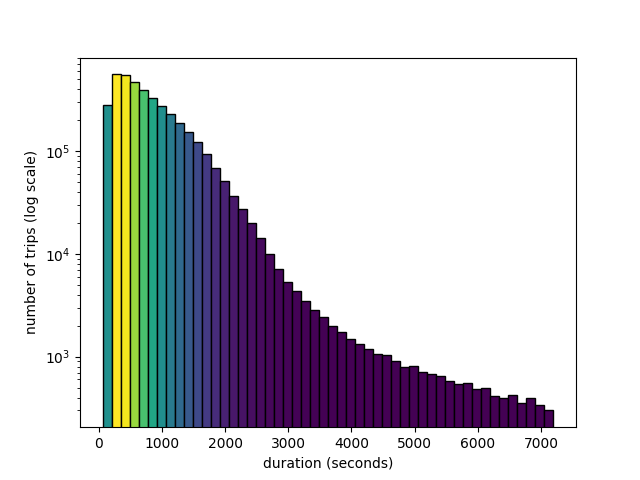

In [4]:
img=dw._Plot(scatterSizePrice);
show(img);

In [5]:
dw._close();
dw=None;